<a href="https://colab.research.google.com/github/MansiSharma7552/ML-Uni/blob/main/Animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def prepare_data(data_dir):

    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            filepath = os.path.join(foldpath, file)
            filepaths.append(filepath)
            labels.append(fold)

    df = pd.DataFrame(data={'filepaths': filepaths, 'labels': labels})
    return df

In [ ]:
!unzip /content/animal_classification.zip -d /content/sample_data

Archive:  /content/animal_classification.zip
   creating: /content/sample_data/Animal Classification/
   creating: /content/sample_data/Animal Classification/dataset/
   creating: /content/sample_data/Animal Classification/dataset/Bear/
  inflating: /content/sample_data/Animal Classification/dataset/Bear/bear_1.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_10.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_10_1.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_10_2.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_10_3.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_11.jpeg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_11_1.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_11_2.jpg  
  inflating: /content/sample_data/Animal Classification/dataset/Bear/Bear_11_3.jpg  
  in

In [ ]:
train_dir = '/content/sample_data/Animal Classification/dataset'
train = prepare_data(train_dir)
print(f'The shape of train data: {train.shape}')
train.head()

The shape of train data: (1944, 2)


,filepaths,labels
0,/content/sample_data/Animal Classification/dat...,Panda
1,/content/sample_data/Animal Classification/dat...,Panda
2,/content/sample_data/Animal Classification/dat...,Panda
3,/content/sample_data/Animal Classification/dat...,Panda
4,/content/sample_data/Animal Classification/dat...,Panda


In [ ]:
!unzip /content/Testing_datset.zip -d /content/sample_data

Archive:  /content/Testing_datset.zip
   creating: /content/sample_data/Testing_data/dataset/
   creating: /content/sample_data/Testing_data/dataset/Bear/
  inflating: /content/sample_data/Testing_data/dataset/Bear/bear_1.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/bear_1_1.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/bear_1_2.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/bear_1_3.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/bear_1_4.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/Bear_10.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/Bear_10_1.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/Bear_10_2.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/Bear_10_3.jpg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/Bear_11.jpeg  
  inflating: /content/sample_data/Testing_data/dataset/Bear/Bear_11_1.jpg  
  inflating: /conte

In [ ]:
test_dir = '/content/sample_data/Testing_data/dataset'
test = prepare_data(test_dir)
print(f'The shape of train data: {test.shape}')
train.head()

The shape of train data: (802, 2)


,filepaths,labels
0,/content/sample_data/Animal Classification/dat...,Panda
1,/content/sample_data/Animal Classification/dat...,Panda
2,/content/sample_data/Animal Classification/dat...,Panda
3,/content/sample_data/Animal Classification/dat...,Panda
4,/content/sample_data/Animal Classification/dat...,Panda


In [ ]:
!unzip /content/Validation_dataset.zip -d /content/sample_data

Archive:  /content/Validation_dataset.zip
   creating: /content/sample_data/Validation_data/dataset/
   creating: /content/sample_data/Validation_data/dataset/Bear/
  inflating: /content/sample_data/Validation_data/dataset/Bear/bear_1.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/bear_1_1.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/bear_1_2.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/bear_1_3.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/bear_1_4.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/Bear_2.jpeg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/Bear_2_1.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/Bear_2_2.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/Bear_2_3.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Bear/Bear_3.jpg  
  inflating: /content/sample_data/Validation_data/dataset/Be

In [ ]:
valid_dir = '/content/sample_data/Validation_data/dataset'
validation = prepare_data(valid_dir)
print(f'The shape of train data: {validation.shape}')
train.head()

The shape of train data: (405, 2)


,filepaths,labels
0,/content/sample_data/Animal Classification/dat...,Panda
1,/content/sample_data/Animal Classification/dat...,Panda
2,/content/sample_data/Animal Classification/dat...,Panda
3,/content/sample_data/Animal Classification/dat...,Panda
4,/content/sample_data/Animal Classification/dat...,Panda


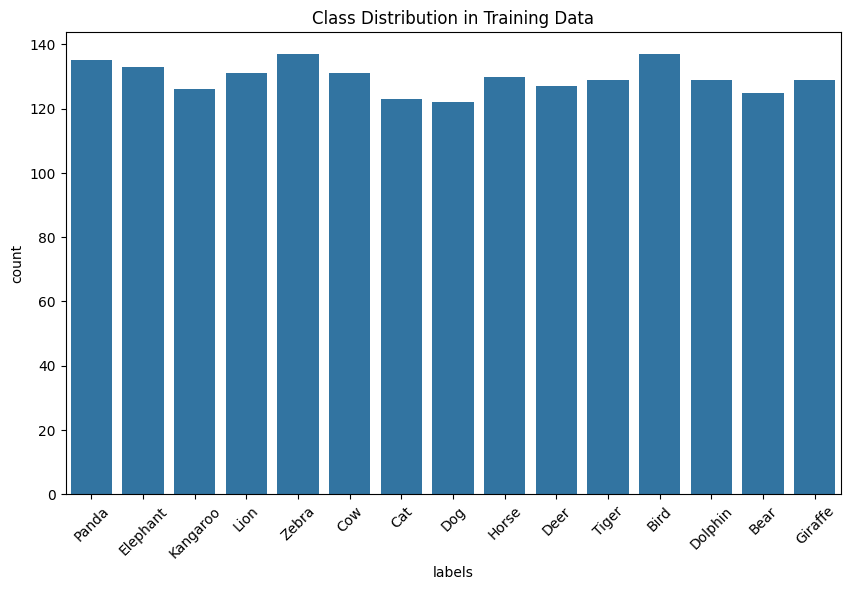

In [ ]:
# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='labels')
plt.title('Class Distribution in Training Data')
plt.xticks(rotation=45)
plt.show()

In [ ]:
batch_size = 32
img_size = (224, 224)

train_genenator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_genenator = ImageDataGenerator(
    rescale=1./255
)


In [ ]:
train_gen = train_genenator.flow_from_dataframe(
    train,
    x_col= 'filepaths',
    y_col= 'labels',
    target_size= img_size,
    class_mode= 'categorical',
    color_mode= 'rgb',
    shuffle= True,
    batch_size= batch_size
)

valid_gen = test_genenator.flow_from_dataframe(
    validation,
    x_col= 'filepaths',
    y_col= 'labels',
    target_size= img_size,
    class_mode= 'categorical',
    color_mode= 'rgb',
    shuffle= False,
    batch_size= batch_size
)

test_gen = test_genenator.flow_from_dataframe(
    test,
    x_col= 'filepaths',
    y_col= 'labels',
    target_size= img_size,
    class_mode= 'categorical',
    color_mode= 'rgb',
    shuffle= False,
    batch_size= batch_size
)


Found 1944 validated image filenames belonging to 15 classes.
Found 405 validated image filenames belonging to 15 classes.
Found 802 validated image filenames belonging to 15 classes.


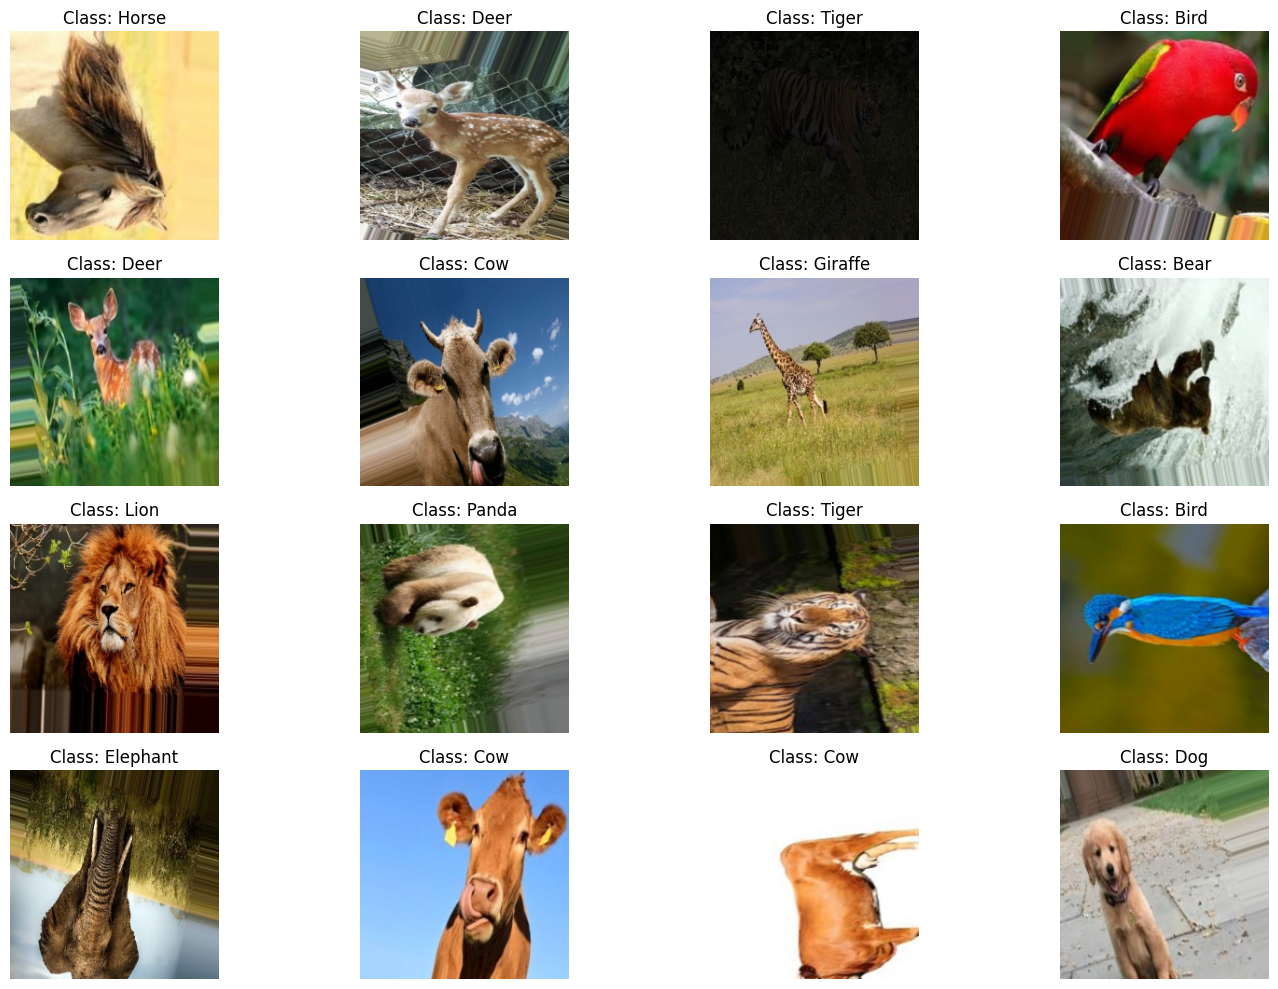

In [ ]:
# Get samples from train data
images, labels = next(train_gen)
class_indices = np.argmax(labels, axis=1)

class_names = list(train_gen.class_indices.keys())

# Plot the images
plt.figure(figsize=(15, 10))
for i in range(min(batch_size, 16)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[class_indices[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Model

In [ ]:
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys()))

# Load EfficientNetB3 pre-trained on ImageNet
base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=img_shape
)

model = Sequential([
    base_model,
    Flatten(),

    Dense(512,activation = "relu"),
    Dropout(0.3),
    Dense(256,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 7, 7, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 75264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    38,535,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,454,398 (188.65 MB)

 Trainable params: 49,367,095 (188.32 MB)

 Non-trainable params: 87,303 (341.03 KB)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_gen,
    epochs=10,
    validation_data=valid_gen,
    batch_size=batch_size,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1391s 22s/step - accuracy: 0.4448 - loss: 2.4519 - val_accuracy: 0.0667 - val_loss: 3.2197
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1291s 21s/step - accuracy: 0.9093 - loss: 0.3018 - val_accuracy: 0.0938 - val_loss: 3.7542
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1293s 21s/step - accuracy: 0.9419 - loss: 0.1800 - val_accuracy: 0.2370 - val_loss: 3.2076
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1291s 21s/step - accuracy: 0.9675 - loss: 0.1253 - val_accuracy: 0.1210 - val_loss: 3.9193
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1299s 21s/step - accuracy: 0.9705 - loss: 0.1148 - val_accuracy: 0.7111 - val_loss: 1.3578
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1284s 21s/step - accuracy: 0.9792 - loss: 0.0641 - val_accuracy: 0.5852 - val_loss: 2.7722
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1342s 21s/step - accuracy: 0.9863 - loss: 0.0531 - val_accuracy: 0.1679 - val_loss: 3.9146
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1287s 21s/step - accuracy: 0.9823 - loss: 0.0487 - val_accu

Evaluate the Model

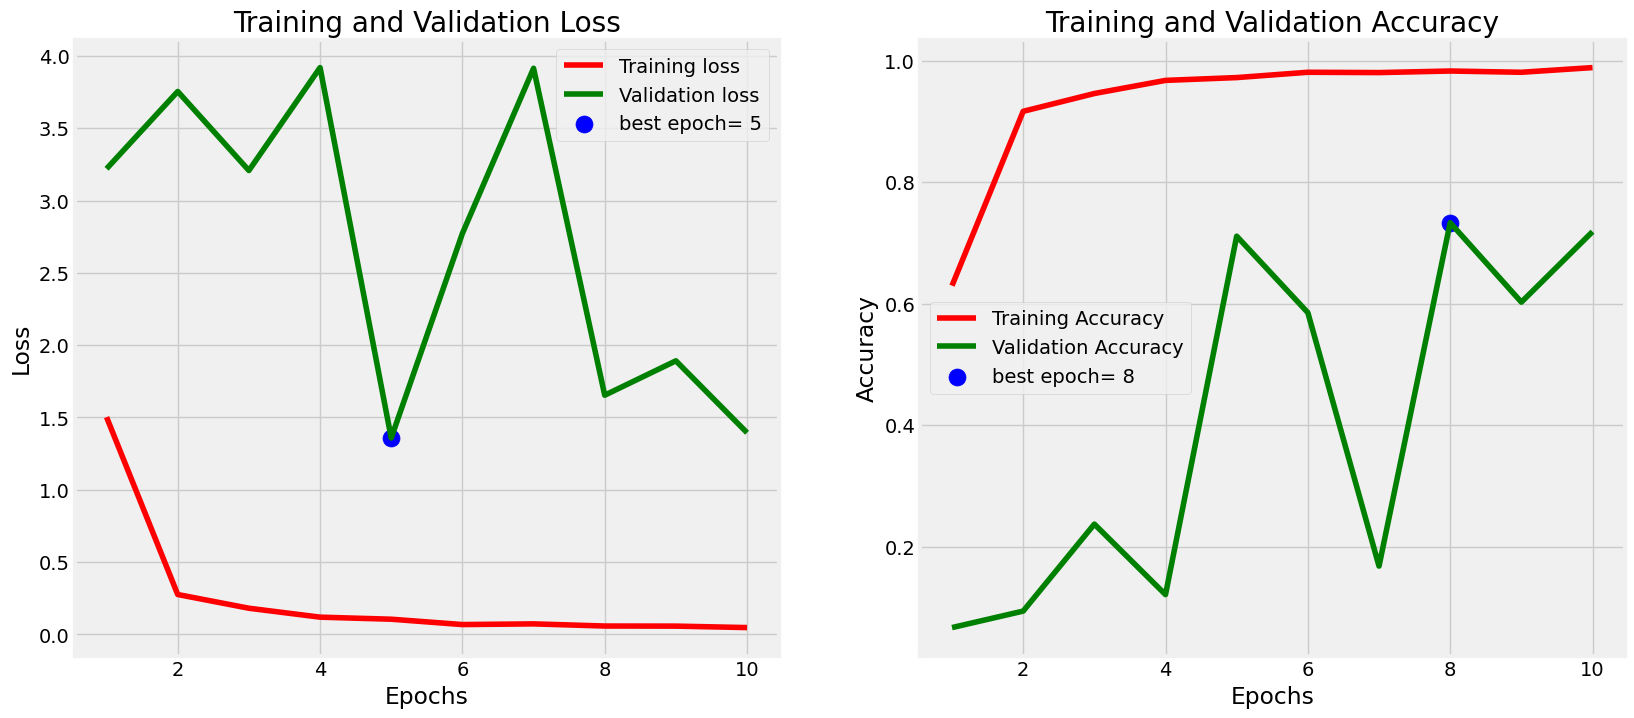

In [ ]:
# Plot Accuracy and Loss
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

61/61 ━━━━━━━━━━━━━━━━━━━━ 286s 5s/step - accuracy: 0.5501 - loss: 1.9365
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.7289 - loss: 1.4354


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.6896 - loss: 1.5566
Train Loss:  2.0655484199523926
Train Accuracy:  0.5339506268501282
--------------------
Validation Loss:  1.357757806777954
Validation Accuracy:  0.7111111283302307
--------------------
Test Loss:  1.4433554410934448
Test Accuracy:  0.6832917928695679


In [ ]:
# Get Predictions
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

26/26 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step


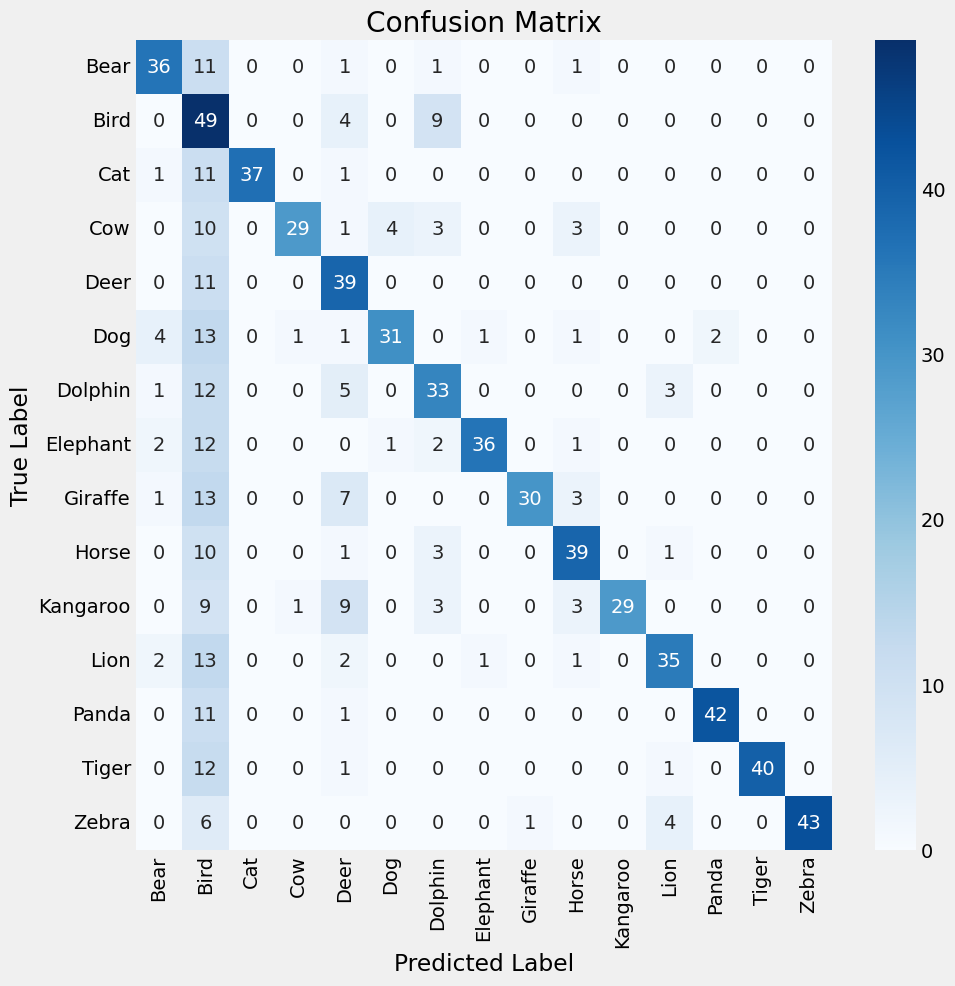

In [ ]:
# Confusion Matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(test_gen.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

        Bear       0.77      0.72      0.74        50
        Bird       0.24      0.79      0.37        62
         Cat       1.00      0.74      0.85        50
         Cow       0.94      0.58      0.72        50
        Deer       0.53      0.78      0.63        50
         Dog       0.86      0.57      0.69        54
     Dolphin       0.61      0.61      0.61        54
    Elephant       0.95      0.67      0.78        54
     Giraffe       0.97      0.56      0.71        54
       Horse       0.75      0.72      0.74        54
    Kangaroo       1.00      0.54      0.70        54
        Lion       0.80      0.65      0.71        54
       Panda       0.95      0.78      0.86        54
       Tiger       1.00      0.74      0.85        54
       Zebra       1.00      0.80      0.89        54

    accuracy                           0.68       802
   macro avg       0.82      0.68      0.72       802
weighted avg       0.82   